# Visualizing Haplorhini Richness

## Reproducing PaleobioBD Graphs using matplot and ggplot

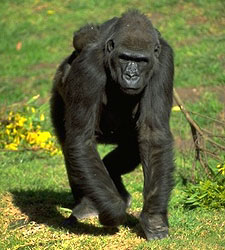

In [16]:
#insert image
from IPython.display import Image
Image(filename= '/home/eeb177-student/Desktop/eeb-177/eeb-174-final-project/haplo_image.png')

**introduction**: Haplorhini is a clade which includes the tarsiers and the simians or anthropoids. The simians include catarrhines, which are Old World monkeys, apes, and  humans, and the platyrrhines or New World monkeys. Haplorhini diverged about 60-65 million years ago. About 5 million years later or 60 million years ago, the infraorder Tarsiiformes, diverged from the haplorhines. The New World monkeys branched off from catarrhines about 40 mya, while the Hominoidea split from Old World monkeys about 25 mya. Identifying which taxa of early primates are haplorhines and which are strepsirrhines is an ongoing challenge because homoplasy in genetics is common.

reference: W illiams, B. A., R. F. Kay, and E. C. Kirk. "New Perspectives on Anthropoid Origins." Proceedings of the National Academy of Sciences 107.11 (2010): 4797-804. Web.

### Visualizing Data using PaleobioBD

    #pbdb_temporal_range: eturns a dataframe and a plot with the time span of the species, genera, families, etc. in your query.

    #pbdb_richness: Returns a dataframe and a plot with the number of species (or genera, families, etc.) across time. You should set the temporal extent and the temporal resolution for the steps.

    pbdb_richness (haplorhini, rank="species", temporal_extent=c(0,60), res=1)

![](haplo_using_paleobioBD2_files/figure-markdown_strict/unnamed-chunk-7-1.png)



### Visualizing Data using matplot

In [159]:
def haplofunc(filename):
    # this function opens the data file and extracts the name and maxage as a dictionary.
    haploDict = {}
    fobj = open(filename,"r", encoding = "ISO-8859-15") # this opens the file 
    reader = fobj.readlines()  # read the file
    for line in reader:   
        line = line.split(",")
        name = line[5][1:-1]
        rank = line[6][1:-1]
        min_age = line[15][1:-1]
        max_age= line[14][1:-1]
        haploDict[name] = max_age
    return haploDict

In [177]:
haplofunc('haploformatted.csv')

{'""Dolichopithecus"" arvernensis': '5.333',
 '""Dolichopithecus"" cf. arvernensis': '3.2',
 'Acrecebus fraileyi': '11.608',
 'Aegyptopithecus zeuxis': '33.9',
 'Afrasia djijidae': '41.3',
 'Afropithecus turkanensis': '22.4',
 'Afrotarsius n. sp. libycus': '48.6',
 'Alouatta n. sp. mauroi': '0.126',
 'Alouatta palliata': '0.0117',
 'Alouatta seniculus': '0.0117',
 'Alouatta sp.': '0.0117',
 'Amphipithecus mogaungensis': '41.3',
 'Amphipithecus moggaungensis': '',
 'Anapithecus hernyaki': '11.1',
 'Anthropoidea indet.': '28.4',
 'Aotus n. sp. dindensis': '16.3',
 'Aotus trivirgatus': '0.0117',
 'Apidium n. sp. bowni': '33.9',
 'Apidium n. sp. moustafai': '33.9',
 'Apidium n. sp. zuetina': '33.9',
 'Apidium phiomense': '33.9',
 'Ardipithecus kadabba': '11.62',
 'Ateles geoffroyi': '0.0117',
 'Ateles paniscus': '0.0117',
 'Australopithecus afarensis': '5.333',
 'Australopithecus africanus': '5.333',
 'Australopithecus anamensis': '5.333',
 'Australopithecus boisei': '5.333',
 'Australopit

In [163]:
import csv
output = open("haplo-output333.csv", "w")
with open("/home/eeb177-student/Desktop/eeb-177/eeb-174-final-project/haploformatted.csv", newline='') as infh:
    reader = csv.reader(infh)
    
    for row in reader:
        if row[6] == "species":
            species = row[5]
            genus = row[5].split(" ")[0]
            print(row[5] + "," + row[15] + "," + row[14])
            output.write(row[5] + "," + row[15] + "," + row[14])
output.close() 

Lufengpithecus lufengensis,5.333,8.7
Laccopithecus robustus,5.333,8.7
Sivapithecus indicus,5.333,11.608
Pongo pygmaeus,0.0117,0.781
Aotus n. sp. dindensis,15.5,16.3
Homo sapiens,0,0.0117
Homo sapiens,0.0117,0.126
Theropithecus oswaldi,0.781,1.806
Homo erectus,0.781,1.806
Australopithecus cf. africanus,2.588,7.246
Parapapio jonesi,3.6,5.333
Homo sapiens,0.0117,0.126
Proconsul cf. africanus,15.97,20.44
Theropithecus oswaldi,0.781,5.333
Theropithecus oswaldi,0.0117,5.333
Cercopithecoides kimeui,0.781,2.588
Theropithecus oswaldi,0.781,5.333
Homo cf. erectus,0.781,1.806
Homo cf. erectus,0.781,1.806
Homo cf. erectus,1.806,2.588
Cercopithecoides kimeui,0.781,3.6
Cercopithecoides kimeui,2.588,3.6
Homo aff. erectus,0.0117,5.333
Cercopithecoides kimeui,1.806,2.588
Homo cf. erectus,0.781,1.806
Theropithecus brumpti,1.806,2.588
Australopithecus boisei,0.781,1.806
Homo cf. erectus,0.781,1.806
Theropithecus oswaldi,0.0117,5.333
Australopithecus boisei,0.781,1.806
Australopithecus cf. boisei,0.781,1.

In [175]:
in_file = open("/home/eeb177-student/Desktop/eeb-177/eeb-174-final-project/haplominmax3.csv")
# read in the first line
# The first line is a header that we don't want in dictionaries
in_file.readline()
# set up empty dictionaries

species_richness = {}

# iterate through every line in the file
for line in in_file:
    #print(line)
    
    # It's a tab delimited file, so we can split the contents up into 
    # the component rows
    items = line.split(",")
    
    # Save some important pieces of information as variables
    species_name = items[1]
    max_age = float(items[3])
    
    
    # Use the variables to populate our three empty lists
    species_richness[species_name] = max_age
        

In [179]:
# let's confirm that our dictionary was populated
species_richness.keys()

dict_keys(['Paralouatta marianae', 'Mesopithecus monspessulanus', 'Aegyptopithecus zeuxis', 'Khoratpithecus ayeyarwadyensis', 'Afropithecus turkanensis', 'Platodontopithecus jianghuaiensis', 'Macaca assamensis', 'Pondaungia minuta', 'Homo rudolfensis', 'Talahpithecus parvus', 'Homo habilis', 'Parapithecus fraasi', 'Alouatta mauroi', 'Saimiri sciureus', 'Chlorocebus aethiops', 'Canaanimico amazonensis', 'Amamria tunisiensis', 'Tarsius eocaenus', 'Trachypithecus phayrei', 'Saadanius hijazensis', 'Patasola magdalenae', 'Biretia piveteaui', 'Alouatta palliata', 'Protopithecus brasiliensis', 'Oligopithecus savagei', 'Alouatta seniculus', 'Apidium moustafai', 'Bugtipithecus inexpectans', 'Homo georgicus', 'Pliopithecus vindobonensis', 'Saguinus fuscicollis', 'Qatrania basiodontos', 'Proconsul heseloni', 'Serapia eocaena', 'Ardipithecus ramidus', 'Pliopithecus zhanxiangi', 'Propliopithecus haeckeli', 'Macaca sylvanus', 'Kalepithecus songhorensis', 'Simonsius grangeri', 'Rhinopithecus roxellan

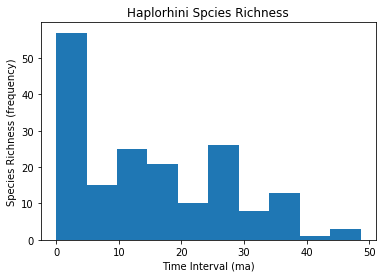

In [180]:
import matplotlib.pyplot as plt


# Most plotting happens on lists, not dictionaries-
# so, let's convert our data into a list
max_age = list(species_richness.values())

# We're ready to make a histogram!
plt.hist(max_age)
plt.xlabel('Time Interval (ma)')
# a y-axis label
plt.ylabel('Species Richness (frequency)')
# A main title for the graph
plt.title("Haplorhini Spcies Richness")
plt.show()

### Visulaizing Data using ggplot

    library(ggplot2)
    haplo_rich<-read.csv("~/Desktop/eeb-177/eeb-174-final-project/haplominmax3.csv", as.is=T)

    head(haplo_rich)

    ##   xx             accepted_name min_ma max_ma
    ## 1 ##       Archicebus achilles   55.8   48.6
    ## 2 ##   Donrussellia lusitanica   55.8   48.6
    ## 3 ## Donrussellia provincialis   55.8   48.6
    ## 4 ##       Afrotarsius libycus   48.6   33.9
    ## 5 ##         Biretia piveteaui   48.6   33.9
    ## 6 ##      Eosimias centennicus   48.6   33.9

    plot1 <-ggplot(haplo_rich, aes(max_ma)) + geom_freqpoly(binwidth=3)
    print(plot1)

![](haplo_ggplot_pres_files/figure-markdown_strict/unnamed-chunk-2-1.png)

\`\`\`

if you would like to take a closer look, please visit: https://github.com/ysalama3/eeb-174-final-project/Youstina's_Presentation

## Thank you!